# Connective Media Data Analysis - Gowalla Social Network
##<span style="color:#B0AEAE">Authors: Shawn Bramson and Oliver Hoffman</span>


## 1. Abstract

The success of Social Networking Sites (SNS) heavily depends on the amount of active users who engage in the service and their contributions. It is not uncommon for many of these users to access SNSs with the sole purpose of benefiting from the contributions of a few. In that sense, the developers and designers of the services find it necessary to motivate users to contribute more content to the site in order to keep the service alive by attracting new users and keeping the current ones engaged in the service. 

Social behaviour theory has been in many cases demonstrated to be appliacble to Connective Media applications. Being able to identify the key concepts of this theory and how they apply both to the design and execution of a SNS would be highly benefitial to the developers behind them. More specifically it would help them understand their users and identify the areas in which their services can be improved. 

In this assignment we intend to use some the Connective Media theories learned throughout the semester to analyze the _Gowalla Social Network_ and see how they apply. In that sense, the theories we want to use include:

* Burke's work on **social learning**, which explains that:
  > _From the perspective of a user, a social network site is primarily comprised of a set of friends and the content they produce. Therefore, **one likely influence on newcomers’ behavior is the behavior of their friends.** Social learning theory suggests that **people learn by observation in social situations, and that they will begin to act like people they observe** even without external incentives._

  We are going to analyze the _Gowalla Social Network_ and see if there is a direct influence on the motivation of users to contribute more based on what they observe in others.  
  
  
* Peerce's work on the **Reader-to-Leader framework**, which categorizes users into _readers, contributors, collaborators, and leaders_. Based on this framework (adapting it of course to the social network in question), we would like to identify the key users (leaders) who are responsible for the motivation to contribute/collaborate on most users of the _Gowalla Social Network_ and who are the readers (who simply use the social network to get information from it). 


* Granovetters's work on **strong ties and weak ties**, which explains how users are influenced by the information they receive from their weak ties (in many cases even more so than the information received from their strong ties). Although identifying how this influence takes place in the _Gowalla Social Network_ might be too complicated, we are going to try and analyze what connections are most likely to be the weak ties in the social network (as they might carry more influence in the users' behaviour than one might initially expect) as well as the strong ties. 


## 2. Data Overview

The dataset on which our analysis will be carried out is the [SNAP's Gowalla Social Network](http://snap.stanford.edu/data/loc-gowalla.html) dataset. [Gowalla](http://en.wikipedia.org/wiki/Gowalla) was a location-based social networking website where users shared their locations by checking-in. The files included in the dataset contain information over the period of Feb. 2009 - Oct. 2010 and include:

* An undirected graph of the friendship network which was collected using their public API, and consists of 196,591 nodes and 950,327 edges.

* A total of 6,442,890 geo-tagged check-ins for each user.

### 2.1 Structure of the data

Before beginning the analysis process it is necessary to see if there are no problems accessing the files and then checking what the structure of the data looks like:

#### Gowalla's Graph Connections File (data/edges.txt)

The column structure of the file should be:
1. The user ID
2. The ID of his friend

In [3]:
import os
DIR_PATH = os.getcwd()  # Get currect directory
N = 10                  # Number of data points to take

# Open edges file and print to see structure
f = open(DIR_PATH + os.sep + "data/edges.txt")
for i in range(N):
    line=f.next().strip().split('\t')
    print line
f.close()

['0', '1']
['0', '2']
['0', '3']
['0', '4']
['0', '5']
['0', '6']
['0', '7']
['0', '8']
['0', '9']
['0', '10']


#### Gowalla's Users Check-ins File (data/checkins.txt)

The column structure of the file should be:
1. The user ID
2. Check-in time
3. Check-in location's latitude
4. Check-in location's longitude
5. Check-in location's ID

In [6]:
# Open edges file and print to see structure
f = open(DIR_PATH + os.sep + "data/checkins.txt")
for i in range(N):
    line=f.next().strip().split('\t')
    print line
f.close()

['0', '2010-10-19T23:55:27Z', '30.2359091167', '-97.7951395833', '22847']
['0', '2010-10-18T22:17:43Z', '30.2691029532', '-97.7493953705', '420315']
['0', '2010-10-17T23:42:03Z', '30.2557309927', '-97.7633857727', '316637']
['0', '2010-10-17T19:26:05Z', '30.2634181234', '-97.7575966669', '16516']
['0', '2010-10-16T18:50:42Z', '30.2742918584', '-97.7405226231', '5535878']
['0', '2010-10-12T23:58:03Z', '30.261599404', '-97.7585805953', '15372']
['0', '2010-10-12T22:02:11Z', '30.2679095833', '-97.7493124167', '21714']
['0', '2010-10-12T19:44:40Z', '30.2691029532', '-97.7493953705', '420315']
['0', '2010-10-12T15:57:20Z', '30.2811204101', '-97.7452111244', '153505']
['0', '2010-10-12T15:19:03Z', '30.2691029532', '-97.7493953705', '420315']


## 3. Data Analysis

Based on the Connective Media theories explained above, we want to analyze the dataset and, for each theory, make the following analyses:

* **Social learning**: we want to see if there is a direct influence on the motivation of users to contribute more based on what they observe in others.  

    * Determine whether the service is used more on average (by considering the number of times users checked in) based on the amount of connections in a user's social network.
    * Determine whether the service is used more on average (by considering the number of days users actively used the service) based on the amount of connections in a user's social network.
    * **Determine whether users tend to progressively use the service more based on the number of friends they gain over time.**
    * Analyze how the check-in dynamic is influenced in terms of checking in all alone vs. with friends (Do users tend to check in moments after their friends checked in?)


* **Reader-to-Leader framework**: we want to identify the _readers, contributors, collaborators and leaders_ in the Gowalla Social Network. 

    * Identify the category to which a user belongs to by analyzing the number of times users have checked in over the total time they were active in the network. (Seeing what the distribution looks like might be helpful)
    * In order to identify the leaders in the network, it is not so much about the number of times they have checked in over time but about the influence they have on others. In that sense, using the previous analysis of how the check-in dynamic is influenced by others, leaders would be the people that have the most influence on others.
    * Do leaders tend to fall under the collaborator category as well?
    
    
* **Strong ties and weak ties**: we are going to try and analyze what connections are most likely to be the strong ties in the social network (by identifying communities in the graph) and see how they correspond to geographical areas. Moreover, we will also try to identify what are the weak ties in the social network (which could potentially have the most influence in helping the social network become popular in new areas). 

    * Identify a central point to which a user belongs to (based on the check-in locations and excluding outliers).
    * Identify clusters of users of geographical areas which will determine communities of users.
    * See how the strong ties in the network are reflected in these geographical areas (do users in the same community tend to be friends?)
    * See how the weak ties in the network are reflected in these geographical areas (who are the users that connect different communitites?)
    

Before proceeding to perform the data analysis, we are going to gather the variables we will most likely need for our analysis. These variables include:

* Users ID
* Number of friends
* Number of days between first and last check-in
* Number of active days a user has used the service
* Total number of check-ins for a user

In [7]:
from datetime import datetime
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Gets the number of days between 2 dates
def cal_days_diff(a,b):
    A = a.replace(hour = 0, minute = 0, second = 0, microsecond = 0)
    B = b.replace(hour = 0, minute = 0, second = 0, microsecond = 0)
    return (A - B).days

#Get number of friends a node has
def get_number_connections(filename, nodes):
    with open(DIR_PATH + os.sep + filename, "rb") as input_data:
        data = [line.strip().split('\t') for line in input_data]
        for line in data:
            node = int(line[0])
            if node not in nodes:
                nodes[node] = {}
                nodes[node]['connections'] = 1
            else:
                nodes[node]['connections'] += 1
    return None

#Get number of days a user has been in the system
def get_number_days(filename, nodes):
    temp_nodes = {}
    with open(DIR_PATH + os.sep + filename, "rb") as input_data:
        data = [line.strip().split('\t') for line in input_data]
        for line in data:
            node = int(line[0])
            if node not in temp_nodes:
                temp_nodes[node] = {}
                temp_nodes[node]['last'] = datetime.strptime(line[1], '%Y-%m-%dT%H:%M:%SZ')
                temp_nodes[node]['first'] = datetime.strptime(line[1], '%Y-%m-%dT%H:%M:%SZ')
                temp_nodes[node]['count'] = 1
                temp_nodes[node]['active_days'] = 1
            else:
                prev = temp_nodes[node]['first']
                temp_nodes[node]['first'] = datetime.strptime(line[1], '%Y-%m-%dT%H:%M:%SZ')
                if prev.date() != temp_nodes[node]['first'].date():
                    temp_nodes[node]['active_days'] += 1
                temp_nodes[node]['count'] += 1

    for node_val in temp_nodes:
        num_days = cal_days_diff(temp_nodes[node_val]['last'],temp_nodes[node_val]['first'])
        nodes[node_val]['number_of_days'] = num_days + 1
        nodes[node_val]['number_of_checkins'] = temp_nodes[node_val]['count']
        nodes[node_val]['number_of_active_days'] = temp_nodes[node_val]['active_days']

    return None

nodes = {}
get_number_connections('data/edges.txt', nodes)
get_number_days('data/checkins.txt', nodes)

print nodes[0]

{'connections': 615, 'number_of_active_days': 113, 'number_of_checkins': 225, 'number_of_days': 151}


The previous _print_ statement shows the structure of a node

    
### 3.1 Social Learning

Now that we have all our information loaded, we are going to see if there is a direct influence on the motivation of users to contribute more based on what they observe in others. 

In order to do so the first thing we are going to do is analyze the number of checkins users have based on the number of connections (friends). While this does not imply necessarily that users are checking in more because their friends are doing so, it does help establish a relationship based on that having more friends makes users tend to check in more:

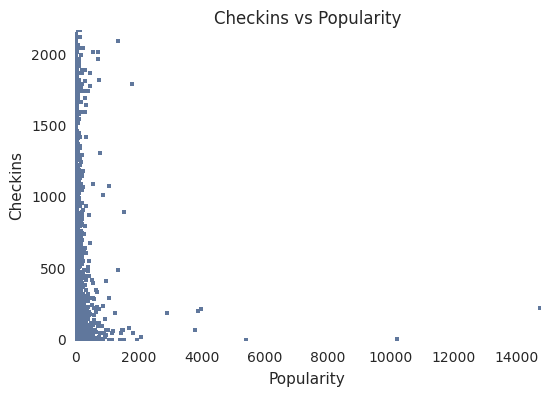

In [83]:
%matplotlib inline
import pylab
pylab.rcParams['savefig.dpi'] = 100 

#Plot
def plot(X,Y, title, xlabel, ylabel, plottype='', limX=max(i for i in X), limY=max(i for i in Y)):
    
    #plt.figure()
    sns.set_palette("deep", desat=.6)
    plt.plot(X, Y,plottype)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0, limX)
    plt.ylim(0, limY)
    plt.show()

X = []
Y = []
temp = {}
for node in nodes:
    #if popCheckIn[key][0]/float(maxVal) < 0.05:
    X.append(nodes[node]['connections'])
    if 'number_of_checkins' not in nodes[node]:
        Y.append(0)
    else:
        Y.append(nodes[node]['number_of_checkins'])
    try:
        if 'number_of_checkins' not in nodes[node]:
            temp[nodes[node]['connections']].append(0)
        else:
            temp[nodes[node]['connections']].append(nodes[node]['number_of_checkins'])
    except:
        if 'number_of_checkins' not in nodes[node]:
            temp[nodes[node]['connections']] = [0]
        else:
            temp[nodes[node]['connections']] = [nodes[node]['number_of_checkins']]
        
plot(X,Y,"Checkins vs Popularity", "Popularity", "Checkins", ".")

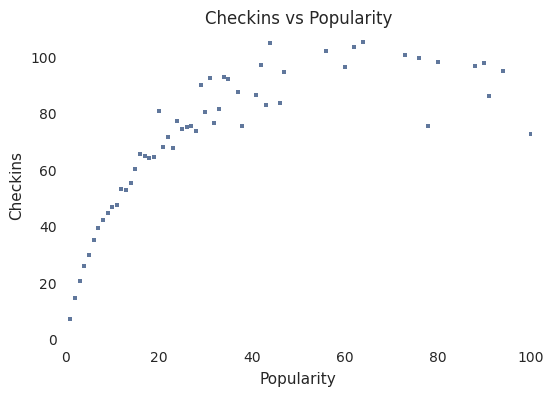

In [84]:
Xavg = []
Yavg = []
for key in temp:
    Xavg.append(key)
    Yavg.append(sum(temp[key])/float(len(temp[key])))
plot(Xavg,Yavg,"Checkins vs Popularity", "Popularity", "Checkins", ".",limX=100, limY=110)

In [18]:
%matplotlib inline
from pylab import *
x = linspace(0, 5, 10)
y = x ** 2

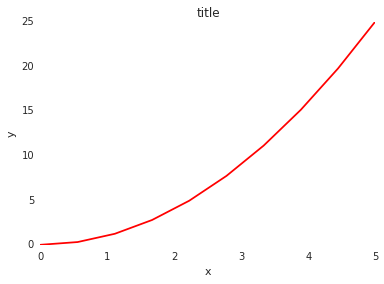

In [20]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()